# Dealing with EcommerceData

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_df = pd.read_csv("Ecommerce Customers")

In [4]:
data_df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
%matplotlib inline

In [7]:
data_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


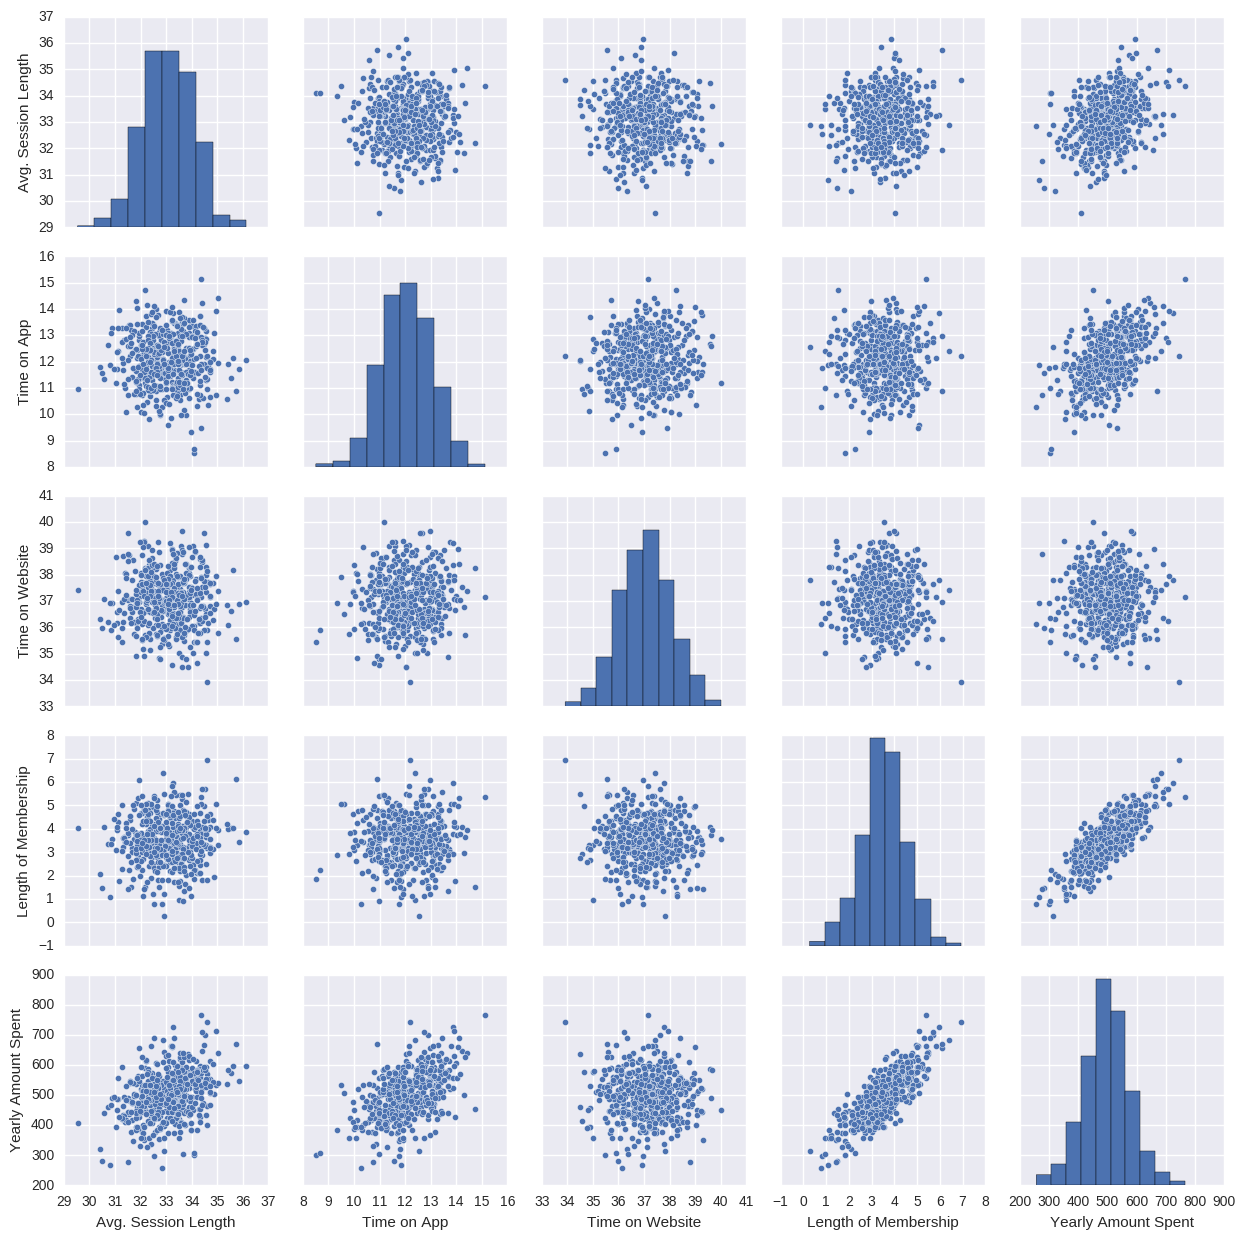

In [8]:
sns.pairplot(data_df)

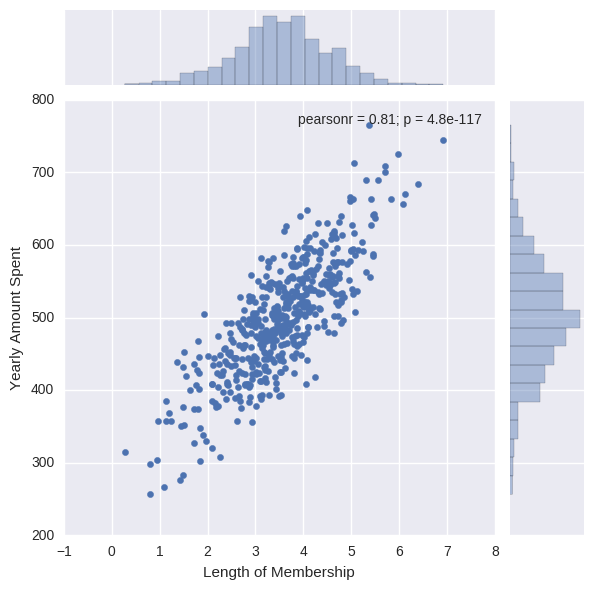

In [13]:
sns.jointplot(data_df['Length of Membership'],data_df['Yearly Amount Spent'])

In [12]:
data_df.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

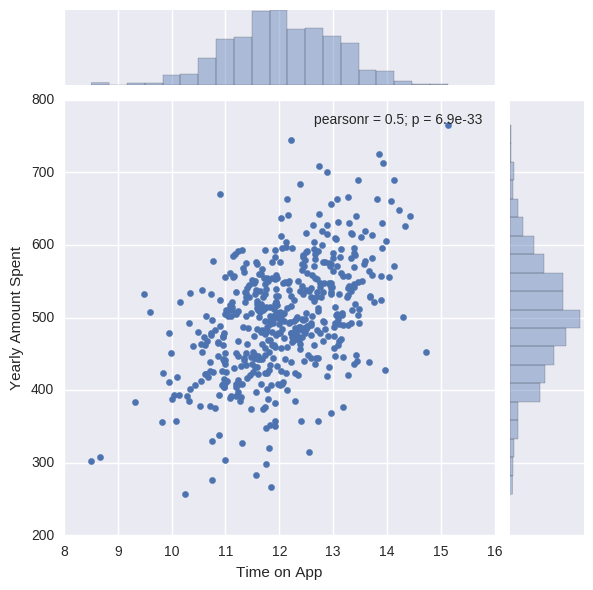

In [15]:
sns.jointplot(data_df['Time on App'],data_df['Yearly Amount Spent'])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_df[['Length of Membership',u'Avg. Session Length', u'Time on App',
       u'Time on Website']], data_df['Yearly Amount Spent'], test_size=0.33, random_state=42)

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_pred = lm.predict(X_test)

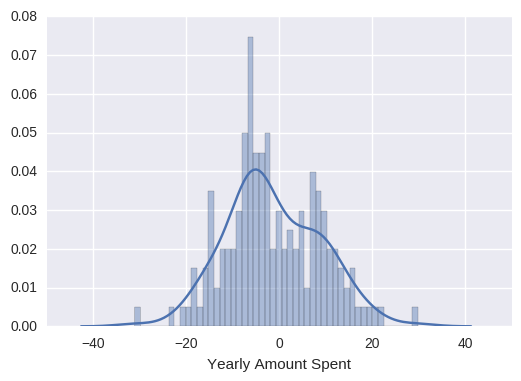

In [28]:
sns.distplot(y_test-y_pred,bins=50)

In [29]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.98113208375517302

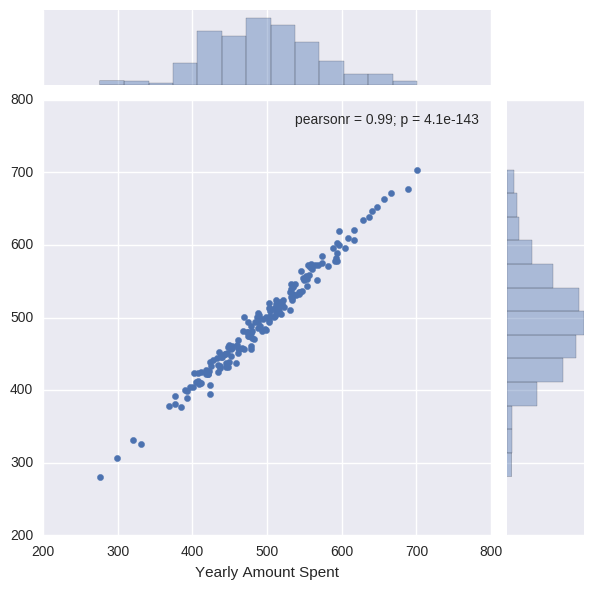

In [35]:
sns.jointplot(y_test,y_pred)

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [46]:
print mean_absolute_error(y_test,y_pred)
print mean_squared_error(y_test,y_pred)

8.35357352502
102.404286599


In [50]:
coeff_df = pd.DataFrame(data=lm.coef_,index=X_test.columns)

In [52]:
coeff_df.columns = ['Coefficients']

In [53]:
coeff_df

,Coefficients
Length of Membership,61.717676
Avg. Session Length,25.706762
Time on App,38.572608
Time on Website,0.625201
